This is a jupyter notebook to get all the data from my shapefiles, group together the objects with the same label and then save the data as png images of a size 10000 x 10000 pix (which correspond to the size of my bounding boxes).

In [91]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch
import pandas as pd
import os
import numpy as np

# Load the box module from shapely to create box objects
from shapely.geometry import box

## Raster data library
import rasterio
import rasterio.features
import rasterio.warp
from rasterio import plot as rioplot

# to display images inline
get_ipython().magic(u'matplotlib inline')
matplotlib.use('Agg')# not sure what I used it for

# some custom files
from img_helpers import get_all_images_in_folder, return_polygons
from PIL import Image

In [57]:
global_path = "D:/allegoria/datasets_alegoria/BD/old_data_moselle/BDTOPO/1_DONNEES_LIVRAISON_2019-06-00227/"

## ROADS

In [58]:
# load all the shapely files related to ROADS
fp_road = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE.shp"
fp_nmrd =  global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_NOMMEE.shp"
fp_prrd=  global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_PRIMAIRE.shp"
fp_scrd = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_SECONDAIRE.shp"
# Read file using gpd.read_file()
data_road = gpd.read_file(fp_road)
data_nmrd =  gpd.read_file(fp_nmrd)
data_prrd = gpd.read_file(fp_prrd)
data_scrd = gpd.read_file(fp_scrd)
# make a single table with all the roads, not just a signle type
all_roads=  pd.concat([data_road, data_nmrd, data_prrd, data_scrd],ignore_index=True ) 


In [59]:
all_roads.head() # small demo of the roads 
len(all_roads)

380731

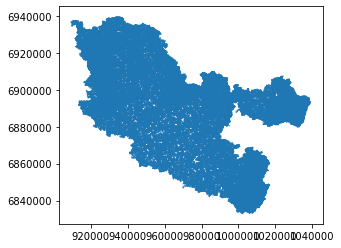

In [60]:
# we can plot all the Roads network of cote d'Or
all_roads.plot()

Data type - geographical projection of he data used.

In [61]:
# check the projection of the data - I need espg 2154, otherwise re-project using geopandas
all_roads.crs

{'init': 'epsg:2154'}

## Houses

In [62]:
# Load all the data from the BUILDINGS caegory
fp_bati =  global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_INDIFFERENCIE.shp"
fp_inds =global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_INDUSTRIEL.shp"

# Read file using gpd.read_file()
buildings1= gpd.read_file(fp_bati)
buildings2 =gpd.read_file(fp_inds)

# concaenate the buildings into a single table
all_buildings =  pd.concat([buildings1, buildings2],ignore_index=True )

C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [63]:
# special buildings
fp_remk = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_REMARQUABLE.shp"
buildings3 = gpd.read_file(fp_remk)
buildings3.NATURE.unique()

array(['Aérogare', 'Gare', 'Mairie', 'Péage', 'Préfecture',
       'Bâtiment religieux divers', 'Sous-préfecture', 'Bâtiment sportif',
       'Tour, donjon, moulin', 'Chapelle', 'Eglise', 'Tribune', 'Château',
       'Fort, blockhaus, casemate', 'Monument'], dtype=object)

In [64]:
#
churches = buildings3.loc[(buildings3['NATURE'] == "Eglise") | (buildings3['NATURE'] == "Chapelle") | (buildings3['NATURE'] =="Bâtiment religieux divers")]
print(len(churches))
towers = buildings3.loc[buildings3['NATURE'] == "Tour, donjon, moulin"]
monuments = buildings3.loc[buildings3['NATURE'] == "Monument"]  
forts = buildings3.loc[buildings3['NATURE'] == 'Fort, blockhaus, casemate']
castels =buildings3.loc[buildings3['NATURE'] =='Château']
ordinary_buildings = buildings3.loc[(buildings3['NATURE'] == "Préfecture") | (buildings3['NATURE'] == "Mairie") |
                                   (buildings3['NATURE'] =="Sous-préfecture") | (buildings3['NATURE'] =="Bâtiment sportif") ]

1292


In [65]:
all_buildings =  pd.concat([all_buildings, ordinary_buildings],ignore_index=True, sort=False)
print(len(all_buildings))

251294


In [66]:
all_buildings.to_crs({'init': 'epsg:2154'})

,HAUTEUR,ID,NATURE,ORIGIN_BAT,PREC_ALTI,PREC_PLANI,Z_MAX,Z_MIN,geometry
0,6,BATIMENT0000000060085452,NaN,Autre,1.0,1.5,258.6,257.9,POLYGON Z ((967224.6000000695 6875480.19999849...
1,5,BATIMENT0000000059961560,NaN,Autre,1.0,1.5,351.0,349.4,POLYGON Z ((950311.7000000603 6933157.49999862...
2,8,BATIMENT0000000059962256,NaN,Autre,1.0,1.5,153.8,153.6,POLYGON Z ((941310.4000000582 6932452.29999862...
3,6,BATIMENT0000000059963695,NaN,Autre,1.0,1.5,153.7,153.5,POLYGON Z ((938865.8000000578 6930213.09999861...
4,5,BATIMENT0000000059964233,NaN,Autre,1.0,1.5,285.5,284.9,POLYGON Z ((956046.600000062 6928882.099998612...
5,5,BATIMENT0000000059964332,NaN,Autre,1.0,1.5,306.5,306.4,POLYGON Z ((952668.4000000611 6928857.89999861...
6,4,BATIMENT0000000059964855,NaN,Autre,1.0,1.5,277.8,277.2,POLYGON Z ((943353.3000000591 6927350.09999861...
7,4,BATIMENT0000000059964866,NaN,Autre,1.0,1.5,254.9,254.1,POLYGON Z ((943089.100000059 6926806.699998609...
8,7,BATIMENT0000000059964971,NaN,Autre,1.0,1.5,175.9,175.4,POLYGON Z ((938287.2000000577 6926837.79999860...
9,5,BATIMENT0000000059965046,NaN,Autre,1.0,1.5,260.4,258.2,POLYGON Z ((958719.6000000628 6926362.49999860...


## WATER 

{'init': 'epsg:2154'}

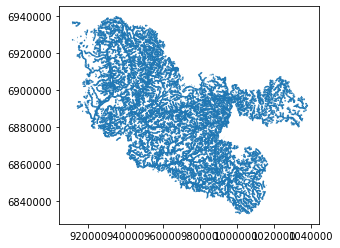

In [67]:
fp_water = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/D_HYDROGRAPHIE/SURFACE_EAU.shp"
fp_cours =  global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/D_HYDROGRAPHIE/TRONCON_COURS_EAU.shp"
data_water = gpd.read_file(fp_water)
data_cours = gpd.read_file(fp_cours)
all_water =  pd.concat([data_water, data_cours],ignore_index=True,sort=False) 
all_water.plot()
len(all_water)
data_water.crs

In [68]:
len(all_water)

28043

## SPORT TERRITORIES

1409

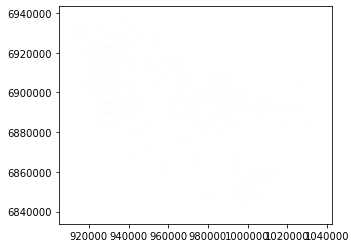

In [69]:
fp_sport =global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/TERRAIN_SPORT.shp"
data_sport = gpd.read_file(fp_sport)
data_sport.plot()
len(data_sport)

## CEMETRIES

928

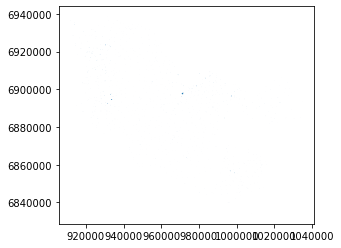

In [70]:
fp_cemetries = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/CIMETIERE.shp"
data_cemetries = gpd.read_file(fp_cemetries)
data_cemetries.plot()
len(data_cemetries)


## GREENERY

In [ ]:
fp_greenery = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/F_VEGETATION/ZONE_VEGETATION.shp"
all_greenery = gpd.read_file(fp_greenery)
len(all_greenery)
all_greenery.plot()

In [72]:
len(data_greenery)

224101

## AERODROMES

23

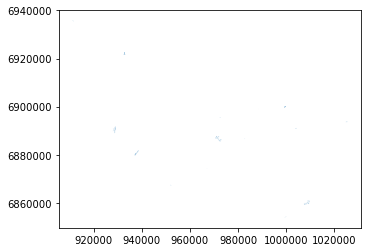

In [73]:
fp_aero = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/PISTE_AERODROME.shp"
data_aero = gpd.read_file(fp_aero)
data_aero.plot()
len(data_aero)

## RAILROADS

3308

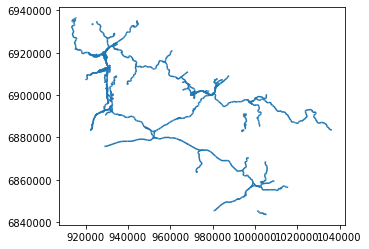

In [74]:
fp_rail = global_path + "\BDT_2-0_SHP_LAMB93_D057-ED083/B_VOIES_FERREES_ET_AUTRES/TRONCON_VOIE_FERREE.shp"
data_rail  = gpd.read_file(fp_rail)
data_rail.plot()
len(data_rail)

## BOUNDING BOXES FROM THE IMAGES

Finally, load the bounding boxes from all the jp2 images I have for a department. I actually don't use them later, taking the bounding box from the jp2 meta data, but alternatively they can be used as bounding boxes for vector data.

In [75]:
bb_boxes_path = 'D:/allegoria/datasets_alegoria/BD/old_data_moselle/BDORTHO/3_SUPPLEMENTS_LIVRAISON_2019-06-00226/BDO_RVB_0M50_JP2-E080_LAMB93_MOSELLE/dalles.shp'
bb_boxes= gpd.read_file(bb_boxes_path)
bb_boxes.crs

{'init': 'epsg:2154'}

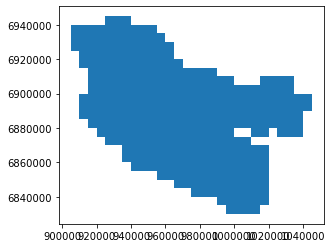

In [76]:
bb_boxes.plot()

## IMAGES as JP2

Load all the jp2 images from the folder and store the absolute path in a list.

In [77]:
folder = 'D:/allegoria/datasets_alegoria/BD/old_data_moselle/BDORTHO/1_DONNEES_LIVRAISON_2019-06-00226/BDO_RVB_0M50_JP2-E080_LAMB93_MOSELLE'
img_type = '.jp2'
image_files = get_all_images_in_folder(folder, img_type)
name = image_files[0][-36:]
print(name)

57-2004-0905-6930-LA93-0M50-E080.jp2


## Save the shape files as .png in correspondence with given images

The function below works very slow, long to execute but the files are really huge - 10000x10000 pixels.
I store each shapefile object on a separate canvas, which is then saved as a .png image. 
Attention, this version save the images with a bounding box around them, look at the next script to see how the bounding box can be disabled.

In [ ]:
plt.ioff() # don't plot anything here
save_path = 'D:/allegoria/topo_ortho/cotedor/roads/'
save_path2 = 'D:/allegoria/topo_ortho/cotedor/buildings/'
save_path3 = 'D:/allegoria/topo_ortho/cotedor/water/'
save_path4 = 'D:/allegoria/topo_ortho/cotedor/sport/'
my_dpi=300

for i in range(25): # range - number of images
    name = image_files[i][-36:]
    print(name)
    with rasterio.open(image_files[i]) as dataset:
    # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()
        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):
            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'epsg:2154', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)
                
        # from now on all the shape data            

        bb_box = geom['coordinates']
        polygon_bbox = Polygon(bb_box[0]) # here the first one corresponds to my prjection, not sure what the others are for.

        # bounding boxes coordinates
        coordinates = bb_box[0]
        x_width, y_width =  (coordinates[2][0]-coordinates[0][0])*2, (coordinates[0][1]-coordinates[1][1])*2
        print(x_width, y_width)


        #roads
        sg_roads = all_roads[all_roads.geometry.within(polygon_bbox)] #extract segments of roads
        name_wpath = save_path + name[1:-4] + '.png'
        plt.autoscale(False)
        fig  = sg_roads.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),linewidth=0.12, edgecolor='c')
        fig.set_xlim([coordinates[0][0],coordinates[2][0]])
        fig.set_ylim([coordinates[1][1],coordinates[0][1]])
        plt.axis('off')
        plt.autoscale(False)   
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(name_wpath, type="png", dpi= float(my_dpi) * 10)

        # buildings
        sg_houses = all_buildings[all_buildings.geometry.within(polygon_bbox)] #extract segments of buildings
        name_wpath = save_path2 + name[1:-4] + '.png'
        fig  = sg_houses.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), facecolor='c', edgecolor='c')
        fig.set_xlim([coordinates[0][0],coordinates[2][0]])
        fig.set_ylim([coordinates[1][1],coordinates[0][1]])
        plt.axis('off')
        plt.autoscale(False)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)

        # water
        sg_water = data_water[data_water.geometry.within(polygon_bbox)] #extract segments of water
        name_wpath = save_path3 + name[1:-4] + '.png'
        fig  = sg_water.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), facecolor='c', edgecolor='c')
        fig.set_xlim([coordinates[0][0],coordinates[2][0]])
        fig.set_ylim([coordinates[1][1],coordinates[0][1]])
        plt.axis('off')
        plt.autoscale(False)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)

        #sport 
        sg_sport = data_sport[data_sport.geometry.within(polygon_bbox)] #extract segments of sport  things
        name_wpath = save_path4 + name[1:-4] + '.png'
        fig  = sg_sport.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), facecolor='c', edgecolor='c')
        fig.set_xlim([coordinates[0][0],coordinates[2][0]])
        fig.set_ylim([coordinates[1][1],coordinates[0][1]])
        plt.autoscale(False)
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)
        
        dataset.close()
        plt.close('all')


    
    
    

## SAVE all LABELS on ONE image

This script saves the jp2 image as a tif one, and also all the shapefiles in different colors on a separate canvas. The frame around the image is deleted. The final files are of the same size as the original jp2 file.

In [ ]:
plt.ioff() # don't plot anything here
import matplotlib as mpl
mpl.rcParams['savefig.pad_inches'] = 0
save_path = 'D:/allegoria/topo_ortho/cotedor/labels_png/'

my_dpi=300
for i in range(295,305): # range - number of images
    name = image_files[i][-36:]
    print(name)
    with rasterio.open(image_files[i]) as dataset:
    # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()
        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):
            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'epsg:2154', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)
       
            raster = dataset.read()
    
       #  some setup
        bb_box = geom['coordinates']
        polygon_bbox = Polygon(bb_box[0])

        # bounding boxes coordinates
        coordinates = bb_box[0]
        x_width, y_width =  (coordinates[2][0]-coordinates[0][0])*2, (coordinates[0][1]-coordinates[1][1])*2
        print(x_width, y_width)

        # save the image
        plt.autoscale(tight=True)
        fig, ax = plt.subplots(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),  frameon=False)
        ax.set_position([0, 0, x_width/float(10*my_dpi), y_width/float(10*my_dpi)])
        fig = rasterio.plot.show(raster, ax=ax)
        plt.axis('off')
        plt.savefig('D:/allegoria/topo_ortho/cotedor/imgs_tif/'+name[1:-4]+'.tif', type="tif", dpi= float(my_dpi)*10)

                    
        # from now on all the shape data            


        # shapefiles
        sg_roads = all_roads[all_roads.geometry.within(polygon_bbox)] #extract segments of roads
        sg_houses = all_buildings[all_buildings.geometry.within(polygon_bbox)] #extract segments of buildings
        sg_water = data_water[data_water.geometry.within(polygon_bbox)] #extract segments of water
        sg_sport = data_sport[data_sport.geometry.within(polygon_bbox)] #extract segments of sport  things
        
        name_wpath = save_path + name[1:-4] + '.png'
        plt.autoscale(False)
        plt.margins(0)
        fig = plt.figure() 
        fig = sg_roads.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),linewidth=0.21, edgecolor='b')
        sg_houses.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='r', ax = fig)
        sg_water.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='g', ax=fig)
        sg_sport.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='k', ax = fig)
        fig.set_xlim([coordinates[0][0],coordinates[2][0]])
        fig.set_ylim([coordinates[1][1],coordinates[0][1]])
        fig.set_position([0, 0, x_width/float(10*my_dpi), y_width/float(10*my_dpi)])
        plt.axis('off')
        plt.autoscale(False)   
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(name_wpath, type="png", dpi= float(my_dpi) * 10)


    
        
        dataset.close()
        plt.close('all')


    

## TEST VISUALIZATION

Just an example of how to plot vector data on a  raster image using rasterio and matplotlib.

{'type': 'Polygon', 'coordinates': [[[980000.0, 6900000.0], [980000.0, 6895000.0], [985000.0, 6895000.0], [985000.0, 6900000.0], [980000.0, 6900000.0]]]}


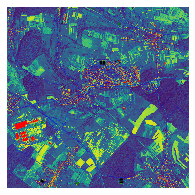

In [80]:
get_ipython().magic(u'matplotlib inline')
save_path = 'D:/allegoria/topo_ortho/mozelle/'
my_dpi=300
i =222
with rasterio.open(image_files[222]) as dataset: #an image name as an input

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'epsg:2154', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

raster = rasterio.open(image_files[222])

name = image_files[i][-36:]
name_wpath = save_path + name[1:-4] + '.png'

bb_box = geom['coordinates']
polygon_bbox = Polygon(bb_box[0])

coordinates = bb_box[0]
x_width, y_width =  (coordinates[2][0]-coordinates[0][0])*2, (coordinates[0][1]-coordinates[1][1])*2

# shapefiles
sg_roads = all_roads[all_roads.geometry.within(polygon_bbox)] #extract segments of roads
sg_houses = all_buildings[all_buildings.geometry.within(polygon_bbox)] #extract segments of buildings
sg_water = data_water[data_water.geometry.within(polygon_bbox)] #extract segments of water
sg_sport = data_sport[data_sport.geometry.within(polygon_bbox)] #extract segments of sport  things


fig, ax = plt.subplots(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)))
rasterio.plot.show(raster, ax=ax)
sg_roads.plot(ax=ax, color='blue', linewidth=0.12)
sg_houses.plot(ax=ax, color='red')
sg_water.plot(ax=ax, color ='green')
sg_sport.plot(ax=ax, color ='black')
plt.axis('off')
plt.savefig(name_wpath, type="png", dpi= float(my_dpi) * 10) # save the resulting figure




## CUT ALL images and save the pathes

In [81]:
## An attempt to cut all the images right away given the coordinates
import csv
import os
import rasterio
import rasterio.mask
resolution = 1000 # the resolution in geo coordinates, the real pixel size will be  Resolution X 2

In [96]:
args = {}
args["save_path"] = "D:/allegoria/topo_ortho/ING_processed_margo/moselle_2004/"
my_dpi = 300
for i in range(len(image_files)):  # range - number of images len(image_files)
    name = image_files[i][-36:]
    print(name)
    with rasterio.open(image_files[i]) as dataset:
        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()
        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):
            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'epsg:2154', geom, precision=6)

        raster = rasterio.open(image_files[i])

        #  some setup
        bb_box = geom['coordinates']
        polygon_bbox = Polygon(bb_box[0])
        polygons = return_polygons(image_bounds=polygon_bbox.bounds,
                                   resolution=(resolution, resolution))  # cut image into patches, the geo res is used

        # create a directory where the patches will be stored
        try:
            os.mkdir(args["save_path"] + name[:-4])
        except:
            print("already exists!")
        pd_poly = pd.DataFrame(polygons)
        pd_poly.to_csv(args["save_path"] + name[:-4] + "/geo_polygons.csv")
        for count, polygon_patch in enumerate(polygons):
            # get rastr patch and save
            out_image, _ = rasterio.mask.mask(raster,  [polygon_patch], crop=True)
            new_im = Image.fromarray(np.swapaxes(out_image, 0, 2))
            new_im.save(args["save_path"]+ name[:-4] + "/" + str(count).zfill(4) + "_img.png")
            #get vector data pixelized and save
            # shapefiles
            sg_roads = all_roads[all_roads.geometry.intersects(polygon_patch)]  # extract segments of roads
            sg_houses = all_buildings[
                all_buildings.geometry.intersects(polygon_patch)]  # extract segments of ordinary buildings
            sg_churches = churches[churches.geometry.intersects(polygon_patch)]  # churches
            sg_towers = towers[towers.geometry.intersects(polygon_patch)]  # towers
            sg_monuments = monuments[monuments.geometry.intersects(polygon_patch)]  # monuments
            sg_forts = monuments[monuments.geometry.intersects(polygon_patch)]  # forts
            sg_castels = castels[castels.geometry.intersects(polygon_patch)]  # chateux
            
            sg_water = all_water[all_water.geometry.intersects(polygon_patch)]  # extract segments of water
            sg_sport = data_sport[data_sport.geometry.intersects(polygon_patch)]  # extract segments of sport  things
            sg_cemetries = data_cemetries[data_cemetries.geometry.intersects(polygon_patch)]  # cemetries
            sg_aero = data_aero[data_aero.geometry.intersects(polygon_patch)]  # aeroports
            sg_railroads = data_rail[data_rail.geometry.intersects(polygon_patch)]  # railroads
            sg_greenery = all_greenery[all_greenery.geometry.intersects(polygon_patch)]  # forests
            # now get them as image
            fig, ax = plt.subplots(figsize=(20.0, 20.0), dpi=100)  # resolution is fixed for 2000

            sg_roads.plot(linewidth=4.0, edgecolor='#FFA500', color='#FFA500', ax=ax)
            
            
            sg_water.plot(color='#0000FF', ax=ax)
            sg_sport.plot(color='#8A2BE2', ax=ax)
            sg_houses.plot(color='#FF0000', ax=ax)
            sg_churches.plot(color='#FFFF00', ax=ax)
            sg_towers.plot(color="#A52A2A", ax=ax)
            sg_monuments.plot(color='#F5F5DC', ax=ax)
            sg_forts.plot(color='#808080', ax=ax)
            sg_castels.plot(color='#000000', ax=ax)
         
            sg_cemetries.plot(color='#4B0082', ax=ax)
            sg_aero.plot(color='#5F021F', ax=ax)
            sg_railroads.plot(color='#FF00FF', ax=ax)
            
            sg_greenery.plot(color='#00FF00', ax=ax)
            ax.set_xlim([polygon_patch.bounds[0], polygon_patch.bounds[2]])
            ax.set_ylim([polygon_patch.bounds[3], polygon_patch.bounds[1]])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.axis('off')
            plt.subplots_adjust(left=0., right=1., top=1., bottom=0.)         
            plt.savefig("D:/allegoria/topo_ortho/ING_processed_margo/moselle_2004/" + name[:-4] +"/"+ str(count).zfill(4) +"_lbl.png", dpi= 100, bbox_inches='tight', pad_inches=0) # save the resulting figure
            plt.close('all')



57-2004-0905-6930-LA93-0M50-E080.jp2
57-2004-0905-6935-LA93-0M50-E080.jp2
57-2004-0905-6940-LA93-0M50-E080.jp2
57-2004-0910-6890-LA93-0M50-E080.jp2
57-2004-0910-6895-LA93-0M50-E080.jp2
57-2004-0910-6900-LA93-0M50-E080.jp2
57-2004-0910-6920-LA93-0M50-E080.jp2
57-2004-0910-6925-LA93-0M50-E080.jp2
57-2004-0910-6930-LA93-0M50-E080.jp2
57-2004-0910-6935-LA93-0M50-E080.jp2
57-2004-0910-6940-LA93-0M50-E080.jp2
57-2004-0915-6885-LA93-0M50-E080.jp2
57-2004-0915-6890-LA93-0M50-E080.jp2
57-2004-0915-6895-LA93-0M50-E080.jp2
57-2004-0915-6900-LA93-0M50-E080.jp2
57-2004-0915-6905-LA93-0M50-E080.jp2
57-2004-0915-6910-LA93-0M50-E080.jp2
57-2004-0915-6915-LA93-0M50-E080.jp2
57-2004-0915-6920-LA93-0M50-E080.jp2
57-2004-0915-6925-LA93-0M50-E080.jp2


MemoryError: 

C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


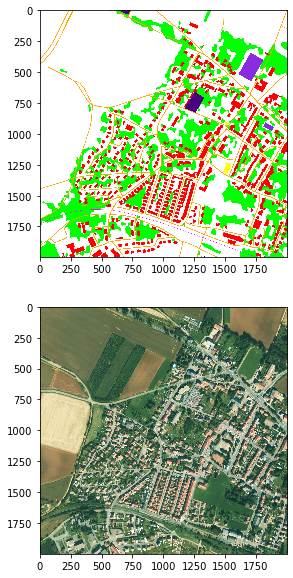

In [105]:
image_png =plt.imread('D:/allegoria/topo_ortho/ING_processed_margo/moselle_2004/57-2004-0910-6930-LA93-0M50-E080/0018_lbl.png')
image =  plt.imread('D:/allegoria/topo_ortho/ING_processed_margo/moselle_2004/57-2004-0910-6930-LA93-0M50-E080/0018_img.png')
rot_png = np.rot90(image_png, k=1, axes=(1,0))
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(211)
plt.imshow(rot_png)

plt.subplot(212)
plt.imshow(image)
plt.show()

In [ ]:
polygons = return_polygons(polygon_bbox.bounds, resolution = (resolution ,resolution))
fig, ax = plt.subplots(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)))
rasterio.plot.show(raster, ax=ax) 
for i in polygons:
        plt.plot(*i.exterior.xy)